In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [3]:
H_array = np.loadtxt('D:/Hi-GalTiles/H_array.txt')
H_array[np.where(H_array>1)] = 1.0
H_array[np.where(H_array<0)] = 0.0
sigma_array = np.loadtxt('D:/Hi-GalTiles/sigma_array.txt')

In [4]:
image_file = 'D:/Hi-GalTiles/l224_SPIRE_250um.fits'

In [5]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: D:/Hi-GalTiles/l224_SPIRE_250um.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   ()      
  1  image         1 ImageHDU        47   (1990, 1876)   float64   
  2  error         1 ImageHDU        47   (1990, 1876)   float64   
  3  coverage      1 ImageHDU        47   (1990, 1876)   float64   
  4  History       1 ImageHDU        23   ()      
  5  HistoryScript    1 BinTableHDU     39   89R x 1C   [345A]   
  6  HistoryTasks    1 BinTableHDU     46   62R x 4C   [1K, 27A, 1K, 9A]   
  7  HistoryParameters    1 BinTableHDU     74   411R x 10C   [1K, 20A, 13A, 211A, 1L, 1K, 1L, 74A, 11A, 41A]   


In [6]:
image_data = hdu_list[1].data

In [7]:
image_size = H_array.shape[0]

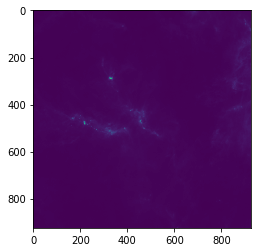

In [8]:
image_data = crop_center(image_data, image_size,image_size)

plt.imshow(image_data)

In [9]:
image_data[np.where(np.isnan(image_data))] = np.min(np.nan_to_num(image_data))
trimmed_image = image_data - np.min(image_data)
trimmed_image = trimmed_image/np.max(trimmed_image)

trimmed_image[np.where(trimmed_image == 0)] = np.sort(trimmed_image.flatten()[np.where(trimmed_image.flatten()!=0)])[0]/2

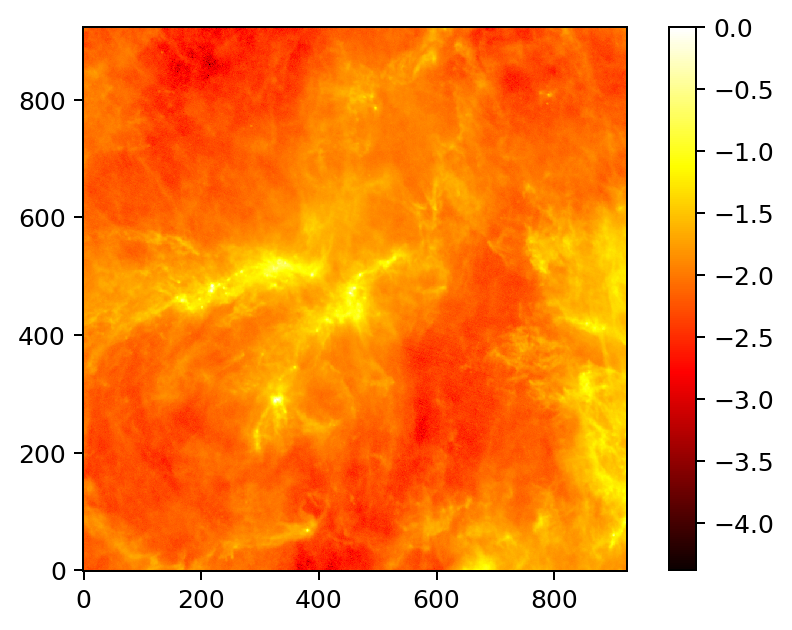

In [20]:
plt.figure(dpi=180)
plt.imshow(np.log10(trimmed_image),cmap='hot',origin='lower')
plt.colorbar()
plt.show()

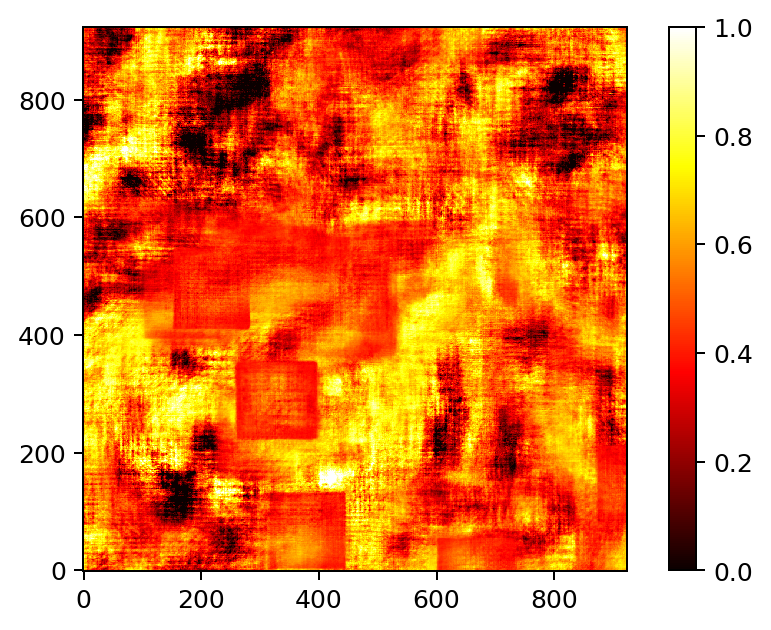

In [13]:
plt.figure(dpi=180)
plt.imshow(H_array.T,cmap='hot',origin='lower')
plt.colorbar()
plt.show()

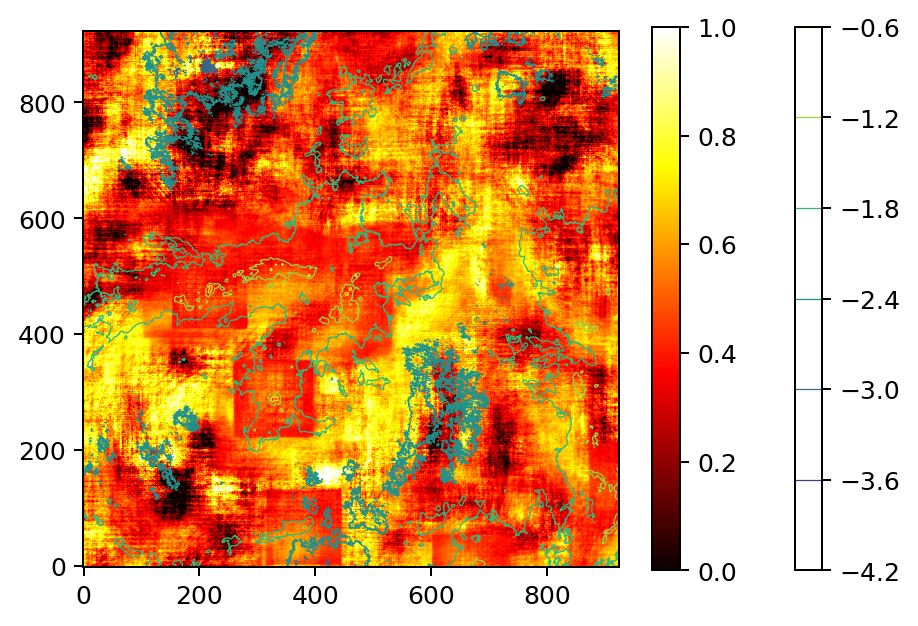

In [14]:
plt.figure(dpi=180)
a = plt.contour(np.log10(trimmed_image),linewidths = 0.5)
b = plt.imshow(H_array.T,cmap='hot',origin='lower')
plt.colorbar(a)
plt.colorbar(b)
plt.show()

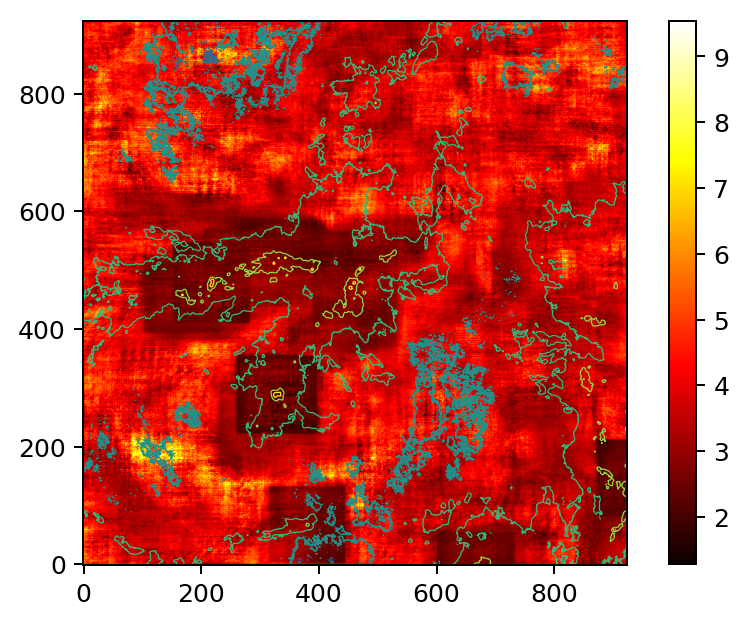

In [15]:
plt.figure(dpi=180)
plt.contour(np.log10(trimmed_image),linewidths = 0.5)
plt.imshow(sigma_array.T,cmap='hot',origin='lower')
plt.colorbar()
plt.show()

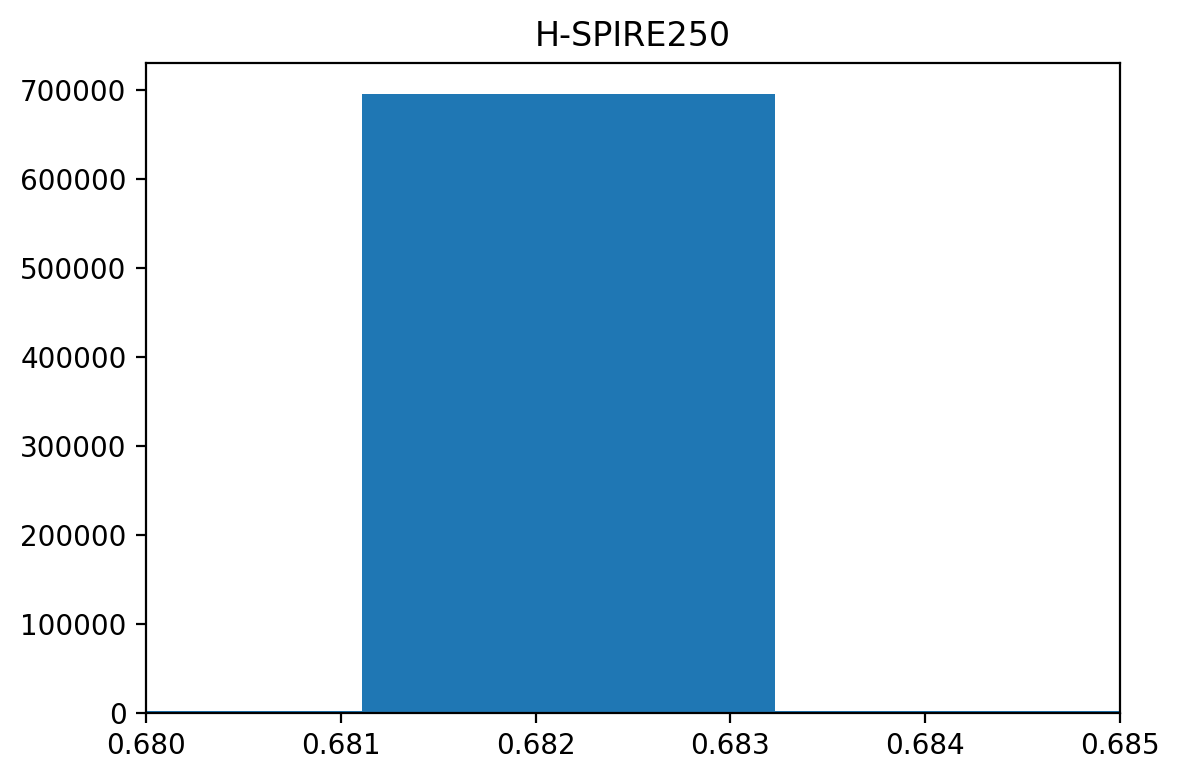

In [8]:
new_H_array = H_array[50:1000,50:1000]

plt.figure(dpi=200)
plt.hist(new_H_array.flatten(),bins=500)
plt.xlim(0.5,0.8)
plt.title('H-SPIRE250')
plt.xlim([0.68,0.685])
plt.tight_layout()
#plt.savefig('C:/Users/C1764397/Workshop/PhD/Meetings/AntMeeting_2019_01_10/H-SPIRE250.png')
plt.show()

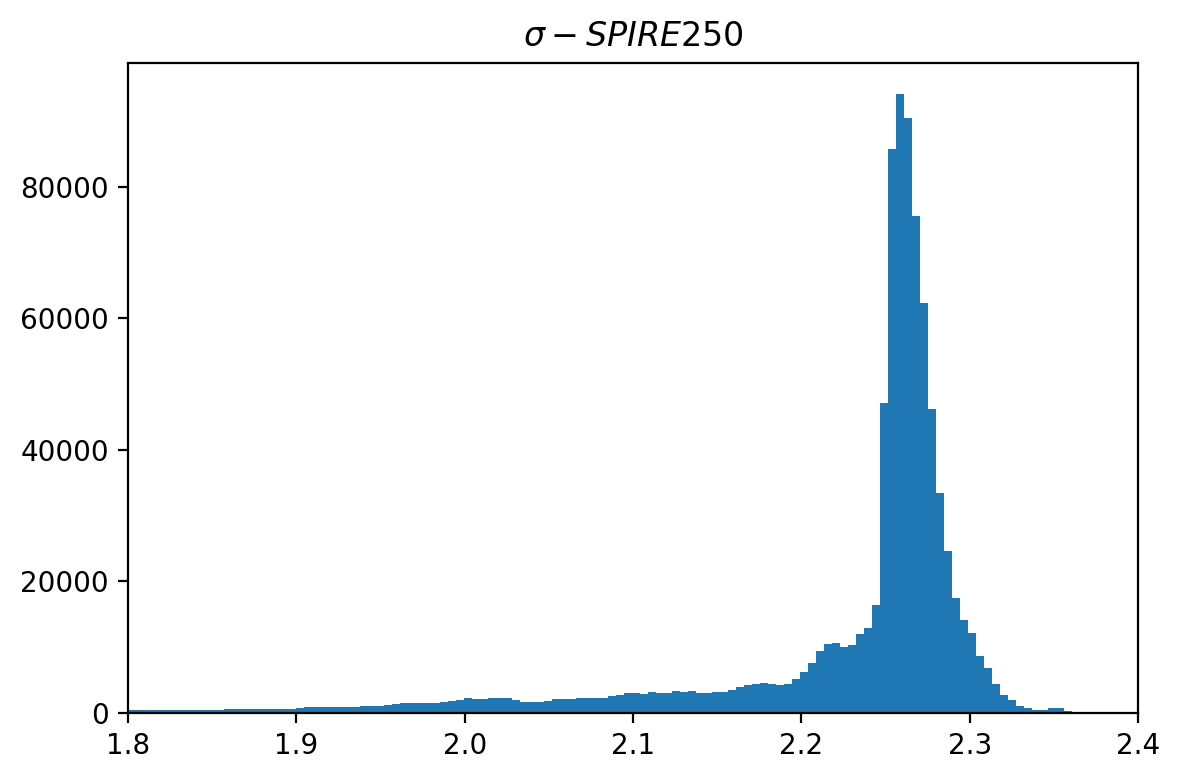

In [44]:
new_sigma_array = sigma_array[50:1000,50:1000]

plt.figure(dpi=200)
plt.hist(new_sigma_array.flatten(),bins=500)
plt.xlim(1.8,2.4)
plt.title(r'$\sigma-SPIRE250$')
plt.tight_layout()
plt.savefig('C:/Users/C1764397/Workshop/PhD/Meetings/AntMeeting_2019_01_10/sigma-SPIRE250.png')
plt.show()

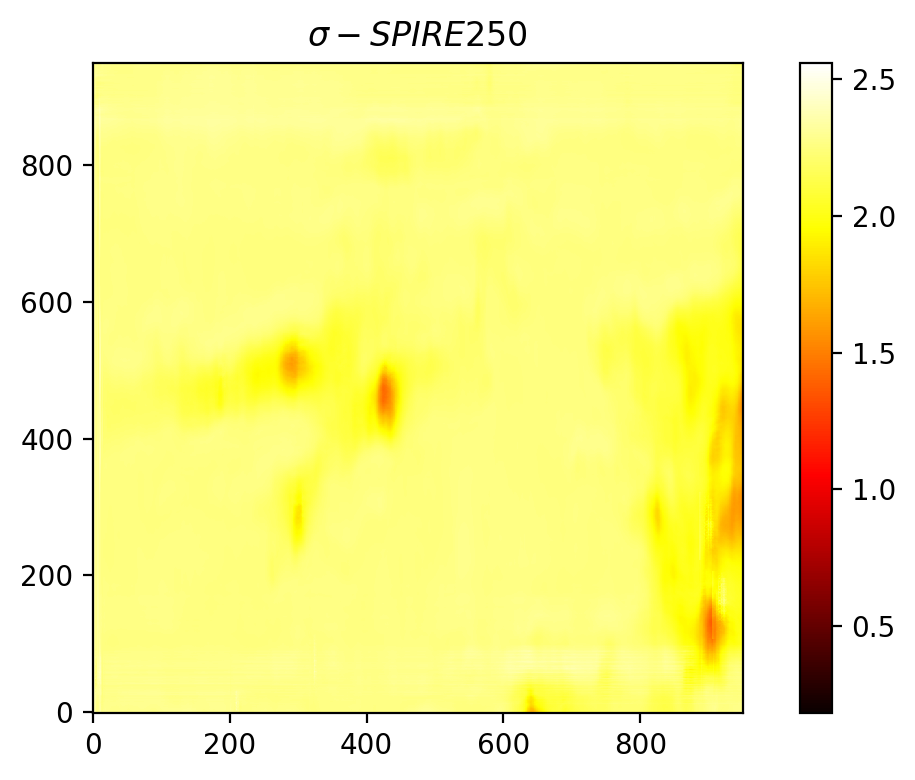

In [45]:
plt.figure(dpi=200)
plt.imshow(new_sigma_array,cmap='hot',origin='lower')
plt.title(r'$\sigma-SPIRE250$')
plt.tight_layout()
plt.colorbar()
plt.savefig('C:/Users/C1764397/Workshop/PhD/Meetings/AntMeeting_2019_01_10/sigma_plot-SPIRE250.png')
plt.show()

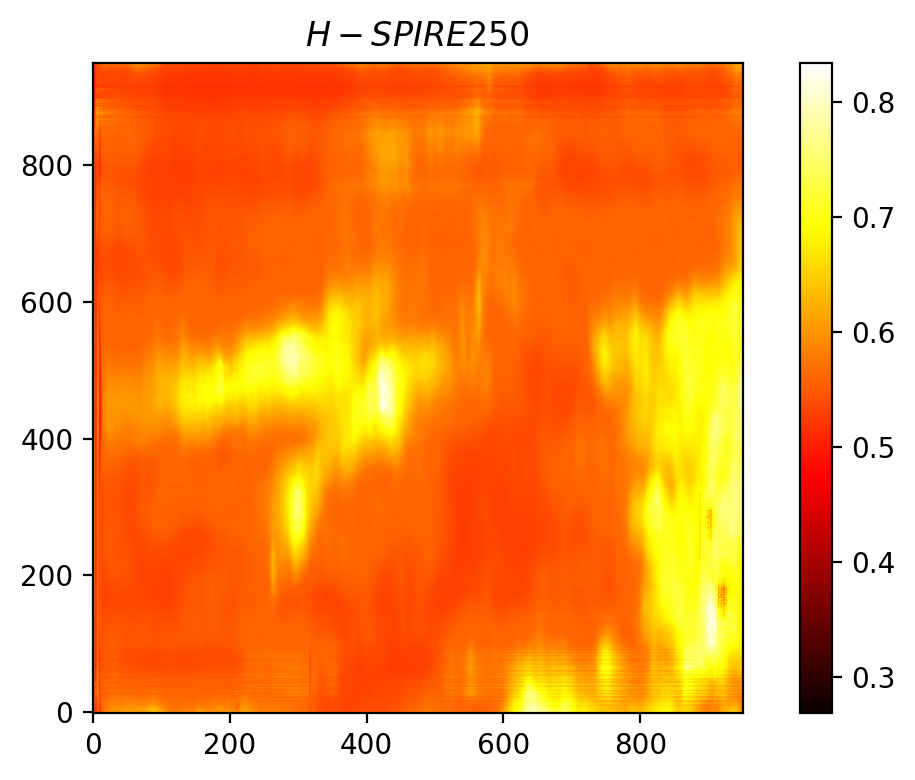

In [46]:
plt.figure(dpi=200)
plt.imshow(new_H_array,origin='lower', cmap='hot')
plt.title(r'$H-SPIRE250$')
plt.tight_layout()
plt.colorbar()
plt.savefig('C:/Users/C1764397/Workshop/PhD/Meetings/AntMeeting_2019_01_10/H_map-SPIRE250.png')
plt.show()